In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [67]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [69]:
df.shape

(103, 7)

## Cleaning

In [71]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] =df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] =df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [73]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [75]:
df.rename(columns = {"Production (Tons)" : "Production(Tons)" },inplace=True)
df.rename(columns = {"Production per Person (Kg)" : "Production per Person(Kg)" },inplace=True)
df.rename(columns = {"Acreage (Hectare)" : "Acreage(Hectare)" },inplace=True)
df.rename(columns = {"Yield (Kg / Hectare)" : "Yield(Kg / Hectare)" },inplace=True)

In [13]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


### Checking Null Values

In [77]:
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production per Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

#### Retrieving a specific row having  null value

In [79]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


#### Deleting row having missing values

In [81]:
df =df.dropna().reset_index()

In [83]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


#### Deleting Unwanted columns "index" and "Unnamed: 0"

In [89]:
df.drop(["Unnamed: 0","index",],axis=1,inplace=True)

In [91]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [93]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production per Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

### Changing data type string to float

In [95]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production per Person(Kg)"]=df["Production per Person(Kg)"].astype(float)
df["Acreage(Hectare)"] =df["Acreage(Hectare)"].astype(float)
df["Yield(Kg / Hectare)"] =df["Yield(Kg / Hectare)"].astype(float)

In [97]:
df.dtypes


Country                       object
Continent                     object
Production(Tons)             float64
Production per Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

#### Checking Unique Values

In [99]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production per Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
dtype: int64

# Univariate Analysis

In [101]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each Continent

In [103]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

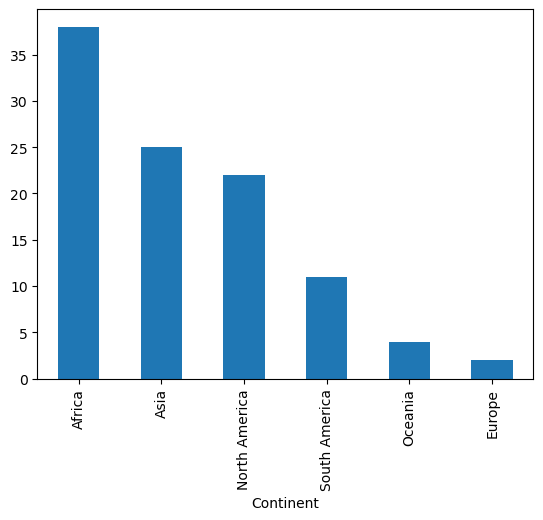

In [105]:
df["Continent"].value_counts().plot(kind="bar")

C:\Users\RUKUM\AppData\Local\Temp\ipykernel_26968\2984944386.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\RUKUM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUKUM\AppData\Local\Temp\ipykernel_26968\2984944386.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Density'>

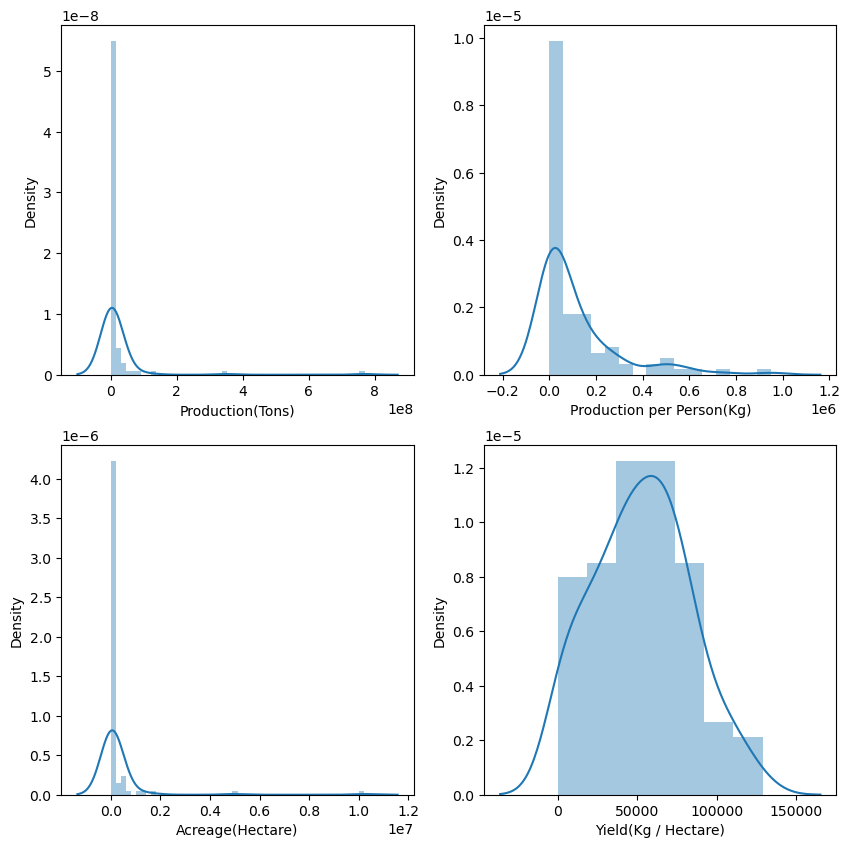

In [107]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.distplot(df["Production per Person(Kg)"])

plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg / Hectare)"])


## Checking Outliers

<Axes: >

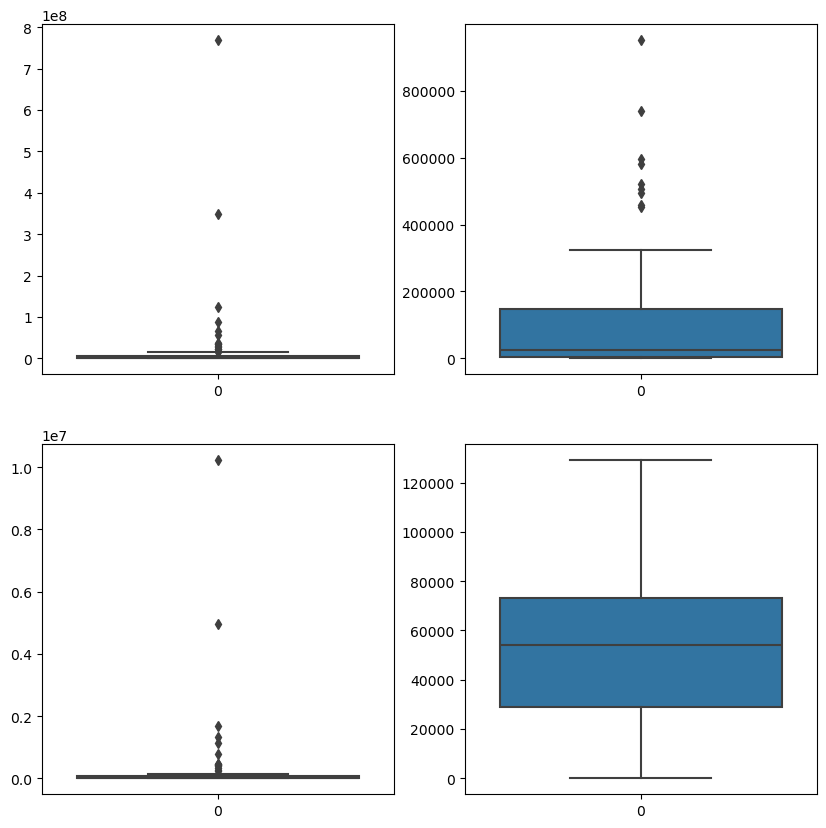

In [109]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.boxplot(df["Production per Person(Kg)"])

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg / Hectare)"])


## Distributions of the columns

In [111]:
df.describe()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


In [113]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Bivariate Analysis

In [118]:
new_df = df[["Country","Production(Tons)"]].set_index("Country")

In [120]:
new_df.head()

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


In [122]:
new_df["Production(Tons)_Percentage"] = new_df["Production(Tons)"]*100/new_df["Production(Tons)"].sum()

In [124]:
new_df.head()

,Production(Tons),Production(Tons)_Percentage
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production(Tons)_Percentage'>

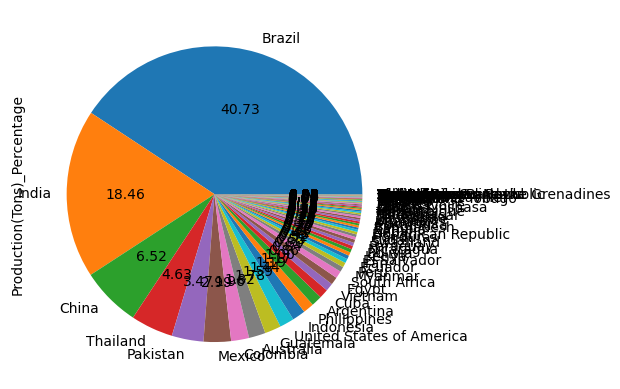

In [126]:
new_df["Production(Tons)_Percentage"].plot(kind="pie",autopct="%.2f")

<Axes: xlabel='Country'>

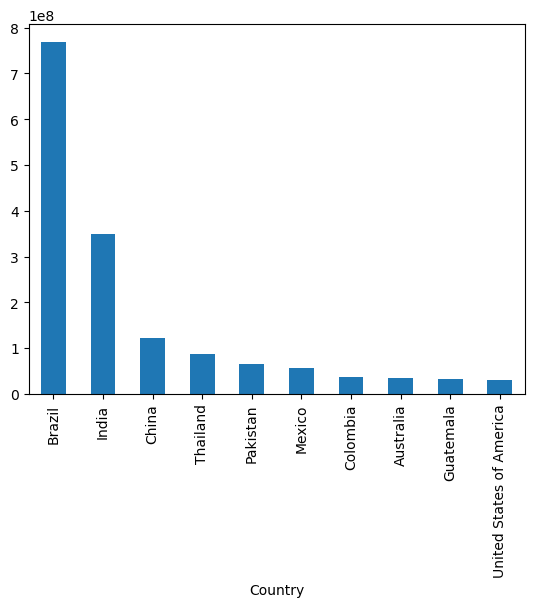

In [128]:
new_df["Production(Tons)"].head(10).plot(kind="bar")

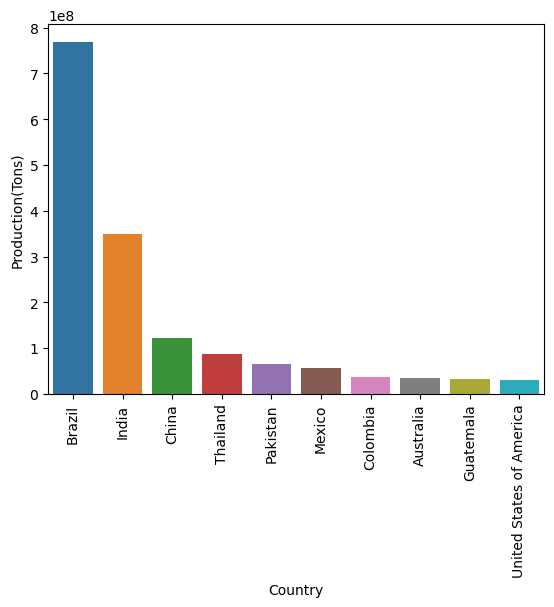

In [130]:
ax = sns.barplot(data= df.head(10),x="Country",y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [132]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which Country has the highest land

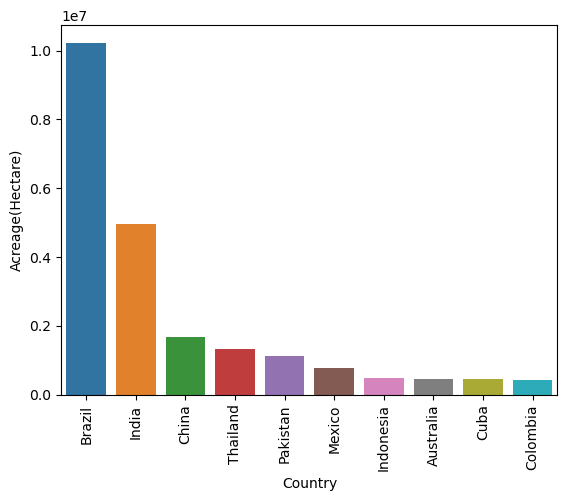

In [134]:
df_acr = df.sort_values("Acreage(Hectare)",ascending=False)
ax = sns.barplot(data= df_acr.head(10),x="Country",y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Which Country has Highest Yeild per Hectare

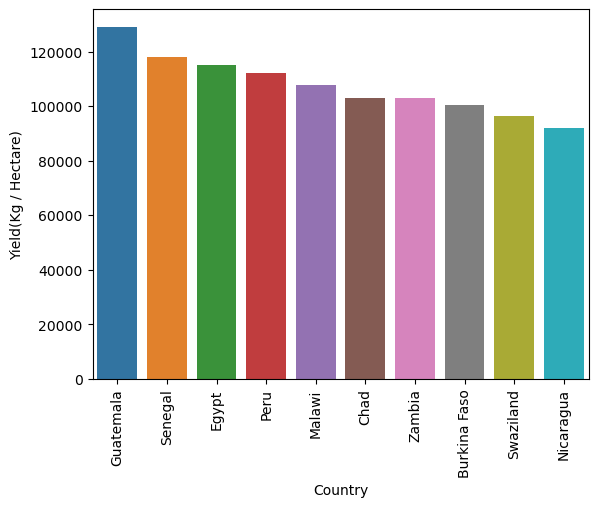

In [136]:
df_acr = df.sort_values("Yield(Kg / Hectare)",ascending=False)
ax = sns.barplot(data= df_acr.head(10),x="Country",y="Yield(Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

##  Which Country has the highest production per person

In [138]:
df.head()

,Country,Continent,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


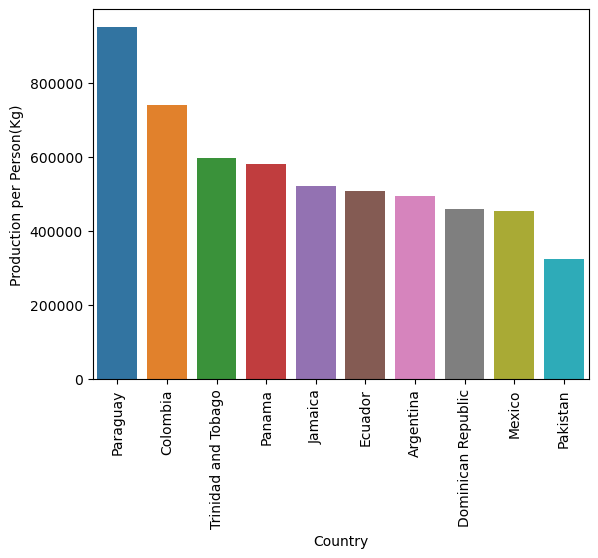

In [140]:
df_acr = df.sort_values("Production per Person(Kg)",ascending=False)
ax = sns.barplot(data= df_acr.head(10),x="Country",y="Production per Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## Correlation

In [146]:
dff = df[["Production(Tons)","Production per Person(Kg)","Acreage(Hectare)","Yield(Kg / Hectare)"]]

In [148]:
dff.head()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,768678382.0,3668.531,10226205.0,75167.5
1,348448000.0,260721.000,4950000.0,70393.5
2,123059739.0,88287.000,1675215.0,73459.1
3,87468496.0,1264.303,1336575.0,65442.2
4,65450704.0,324219.000,1130820.0,57879.0


In [150]:
dff.corr()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production per Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg / Hectare),0.132812,0.017999,0.113433,1.000000


## Do countries has highest land produce more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

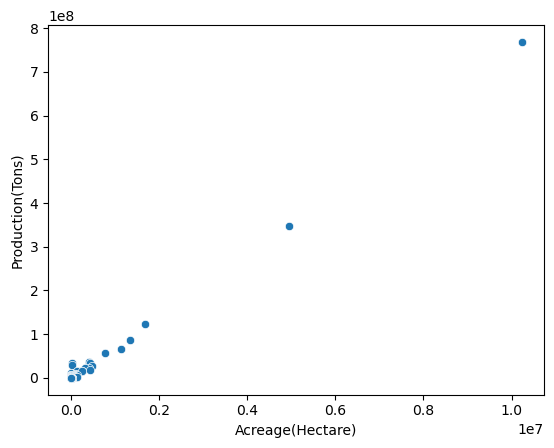

In [152]:
sns.scatterplot(data=dff,x="Acreage(Hectare)",y="Production(Tons)",)

## Do countries yeild more sugarcane per hectare produces more sugarcane total

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Production(Tons)'>

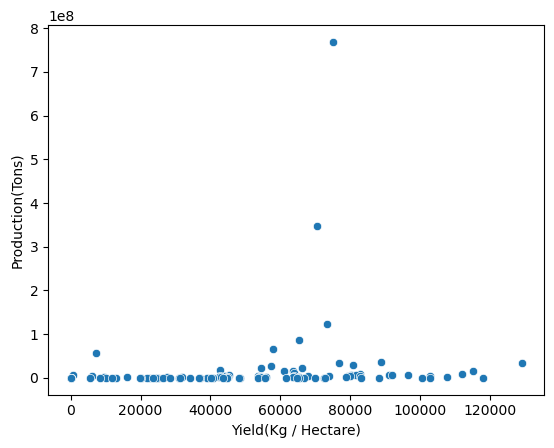

In [154]:
sns.scatterplot(data=dff,x="Yield(Kg / Hectare)",y="Production(Tons)")

# Analysis for Continent

## Which Continent produce maximum sugarcane?

In [156]:
df_cont = df.groupby("Continent").sum()

In [158]:
df_cont

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


<Axes: xlabel='Continent'>

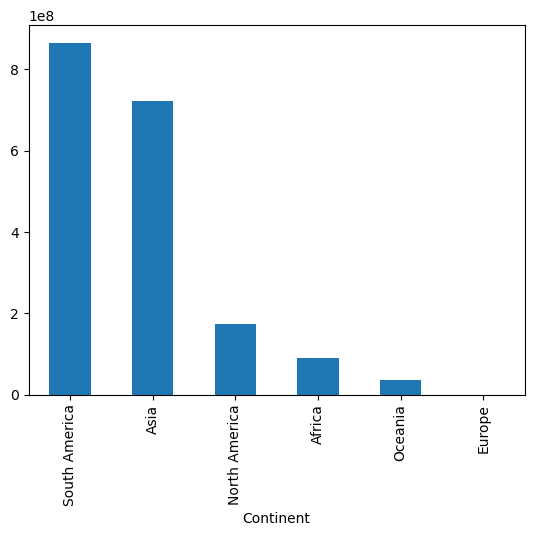

In [160]:
df_cont["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

## Do Number of Countries in a Continent  affect Production?


In [162]:
df_cont["Number_of_Countries"]=df.groupby("Continent").count()["Country"]

In [164]:
df_cont.head()

,Country,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Number_of_Countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4


<Axes: xlabel='Number_of_Countries', ylabel='Production(Tons)'>

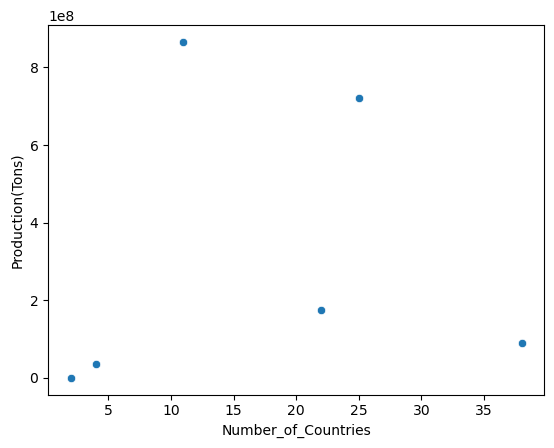

In [166]:
sns.scatterplot(data=df_cont,x="Number_of_Countries",y="Production(Tons)")

## Production Distribution by Continent

In [170]:
df_cont.drop("Country",axis=1,inplace=True)

In [172]:
df_cont.head()

,Production(Tons),Production per Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),Number_of_Countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4


<Axes: ylabel='Production(Tons)'>

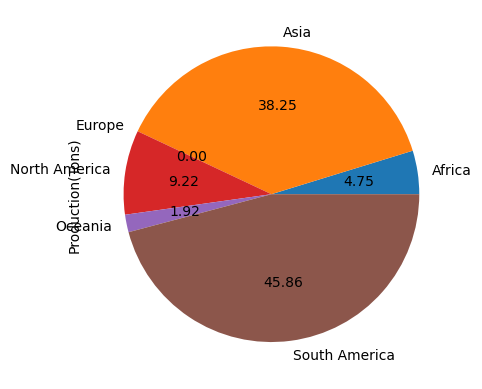

In [174]:
df_cont["Production(Tons)"].plot(kind="pie",autopct="%.2f")